<a href="https://colab.research.google.com/github/adam-bozman/wsuassetpricing/blob/main/Proposal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake Corporate Accounts Slam Real Stock Prices

### Investor sentiment and fake news: how closed systems eliminate rationality

---

In spring of 2021, the GameStop anomaly shed light on a unique distinction between contemporary and historical investment in the United States.  Suddenly, it seemed, individuals – not institutions – became market makers.  What was once a delicacy reserved for the elitists of Goldman Sachs was now a commonplace dessert on the table of any retail investors with access to the internet.  Without presumption, I develop a model to understand the importance of sentiment, frequency, and timing with respect to market predictions in this evolving discipline.  


How do closed systems and echo chambers impact the demand of discussed securities?

How does the dissemination of misinformation impact the demand for highlighted securities, or the lack thereof?  

### Following Lasse Pedersen, can a risk free rate and intentionally bad actor be introduced into his closed, discrete system?  Continuous system?


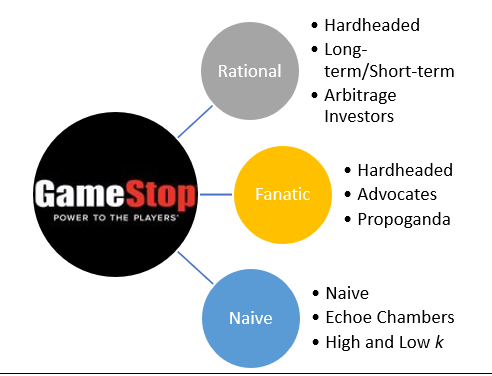

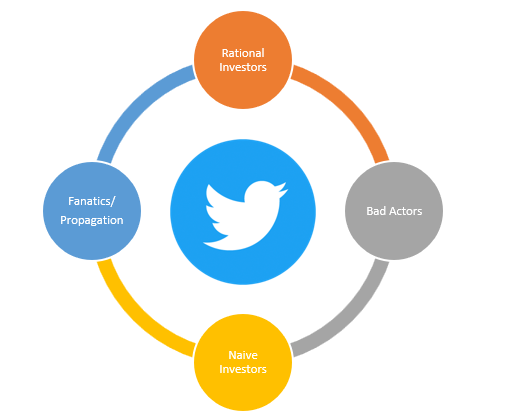

# Prep Work

In [ ]:
!pip install snscrape
!pip install wordcloud
!pip install nltk
!pip install yfinance

In [2]:
#load proper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import re
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import snscrape.modules.twitter as sntwitter
#import snscrape.modules.reddit as snreddit
import nltk

nltk.download('vader_lexicon') #required for Sentiment Analysis


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

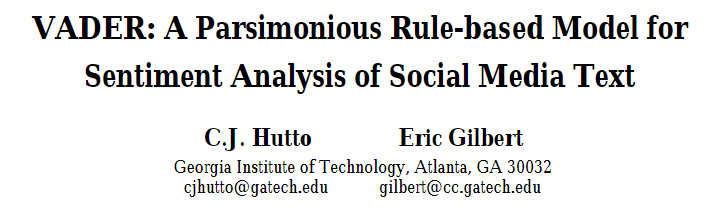

Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for
Sentiment Analysis of Social Media Text. Eighth International Conference on
Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

# Twitter Analysis of Eli Lilly
### Down 4.45%

"We are excited to announce insulin is now free."

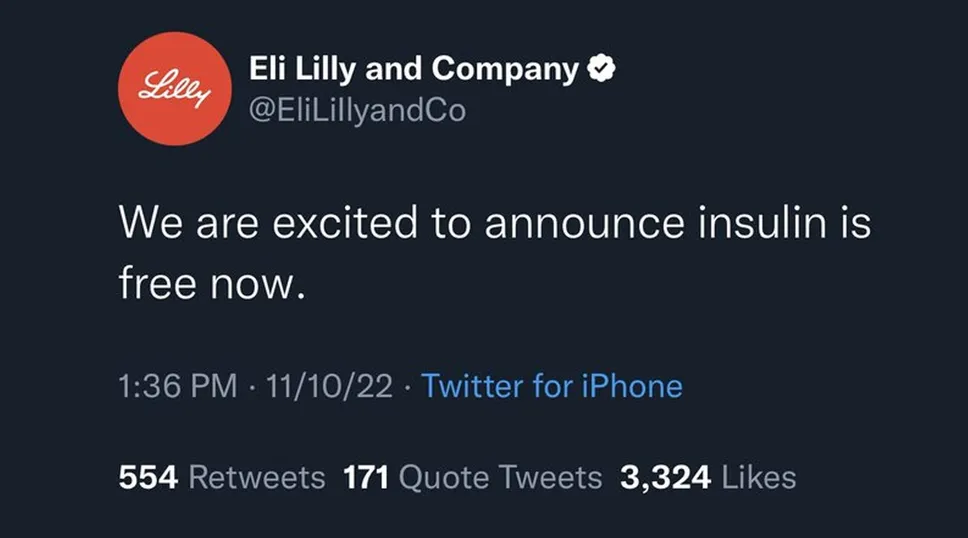

In [3]:
#Get user input
query = input("Query: ")

#As long as the query is valid (not empty or equal to '#')...
if query != '':
    noOfTweet = input("Enter the number of tweets you want to Analyze: ")
    if noOfTweet != '' :
        noOfDays = input("Enter the number of days you want to Scrape Twitter for: ")
        if noOfDays != '':
                #Creating list to append tweet data
                tweets_list = []
                now = dt.date.today()
                now = now.strftime('%Y-%m-%d')
                yesterday = dt.date.today() - dt.timedelta(days = int(noOfDays))
                yesterday = yesterday.strftime('%Y-%m-%d')
                for i,tweet in enumerate(sntwitter.TwitterSearchScraper(query + ' lang:en since:' +  yesterday + ' until:' + now + ' -filter:links -filter:replies').get_items()):
                    if i > int(noOfTweet):
                        break
                    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.username])

                #Creating a dataframe from the tweets list above 
                df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

                print(df)


Query: eli lilly
Enter the number of tweets you want to Analyze: 500
Enter the number of days you want to Scrape Twitter for: 5
                     Datetime             Tweet Id  \
0   2022-11-13 23:32:32+00:00  1591937085883416576   
1   2022-11-13 23:05:38+00:00  1591930317136592897   
2   2022-11-13 22:57:07+00:00  1591928170772680710   
3   2022-11-13 22:53:46+00:00  1591927327365431296   
4   2022-11-13 22:50:26+00:00  1591926491625164800   
..                        ...                  ...   
496 2022-11-12 12:21:01+00:00  1591405704513978369   
497 2022-11-12 12:20:03+00:00  1591405460518801408   
498 2022-11-12 12:15:47+00:00  1591404385833488384   
499 2022-11-12 12:14:09+00:00  1591403976192589825   
500 2022-11-12 12:13:09+00:00  1591403724240343040   

                                                  Text         Username  
0    Hearing about this eli Lilly thing has got me ...       BoBearsNFT  
1    Eli Lilly gotta charge $40,000 an insulin to m...       TreestarOO  
2

In [4]:
# Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

#applying this function to Text column of our dataframe
df["Text"] = df["Text"].apply(cleanTxt)


In [5]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)

#Assigning Initial Values
positive = 0
negative = 0
neutral = 0
#Creating empty lists
tweet_list1 = []
neutral_list = []
negative_list = []
positive_list = []

#Iterating over the tweets in the dataframe
for tweet in df['Text']:
    tweet_list1.append(tweet)
    analyzer = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = analyzer['neg']
    neu = analyzer['neu']
    pos = analyzer['pos']
    comp = analyzer['compound']

    if neg > pos:
        negative_list.append(tweet) #appending the tweet that satisfies this condition
        negative += 1 #increasing the count by 1
    elif pos > neg:
        positive_list.append(tweet) #appending the tweet that satisfies this condition
        positive += 1 #increasing the count by 1
    elif pos == neg:
        neutral_list.append(tweet) #appending the tweet that satisfies this condition
        neutral += 1 #increasing the count by 1 

positive = percentage(positive, len(df)) #percentage is the function defined above
negative = percentage(negative, len(df))
neutral = percentage(neutral, len(df))


In [6]:
#Converting lists to pandas dataframe
tweet_list1 = pd.DataFrame(tweet_list1)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
#using len(length) function for counting
print("In the last " + noOfDays + " days, there have been", len(tweet_list1) ,  "tweets on " + query, end='\n*')
print("Positive Sentiment:", '%.2f' % len(positive_list), end='\n*')
print("Neutral Sentiment:", '%.2f' % len(neutral_list), end='\n*')
print("Negative Sentiment:", '%.2f' % len(negative_list), end='\n*')


In the last 5 days, there have been 501 tweets on eli lilly
*Positive Sentiment: 211.00
*Neutral Sentiment: 53.00
*Negative Sentiment: 237.00
*

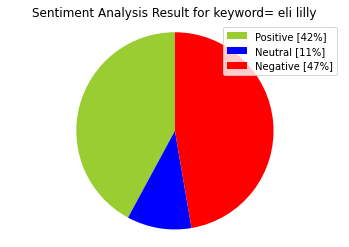

In [7]:
#Creating PieCart

labels = ['Positive ['+str(round(positive))+'%]' , 'Neutral ['+str(round(neutral))+'%]','Negative ['+str(round(negative))+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+query+"" )
plt.axis('equal')
plt.show()


Wordcloud for eli lilly


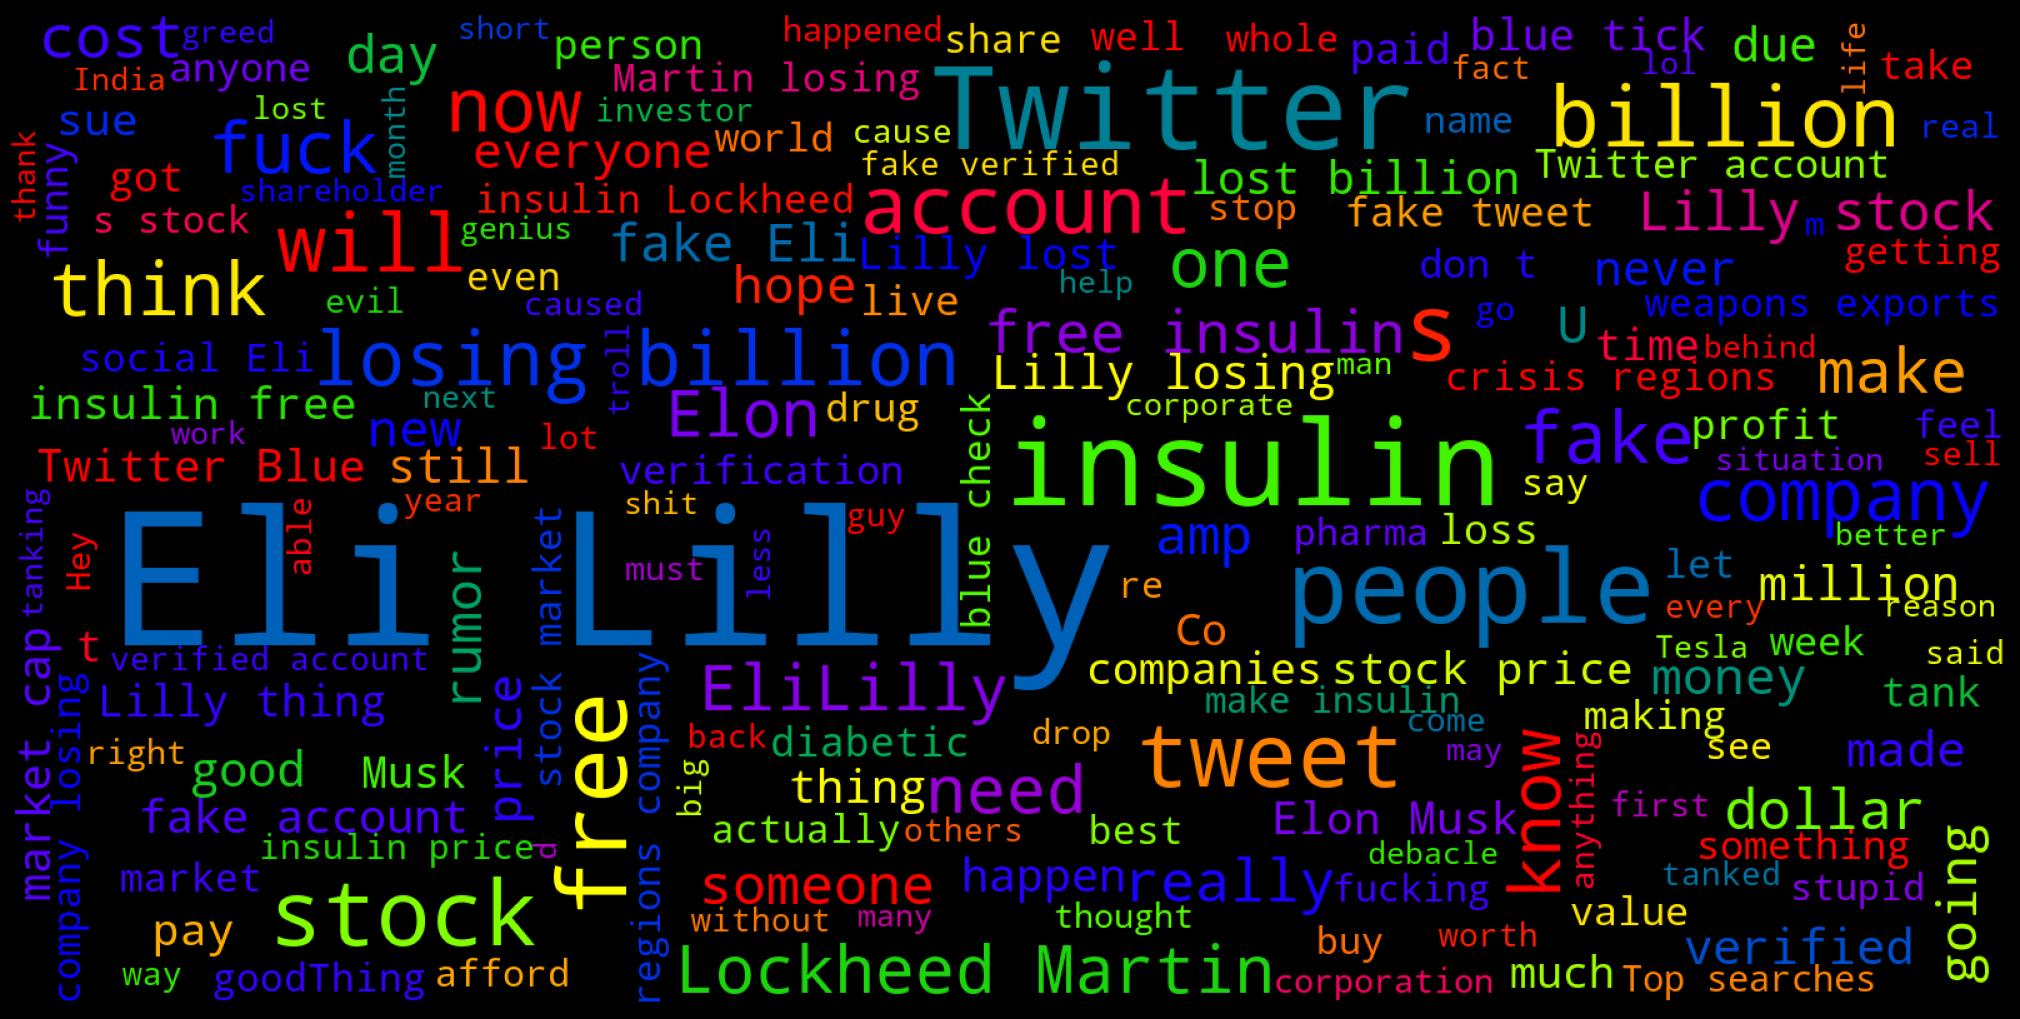

In [8]:
# word cloud visualization
def word_cloud(text):
    stopwords = set(STOPWORDS)
    allWords = ' '.join([twts for twts in text])
    wordCloud = WordCloud(background_color='black',width = 1600, height = 800,stopwords = stopwords,min_font_size = 20,max_font_size=150,colormap='prism').generate(allWords)
    fig, ax = plt.subplots(figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    ax.axis("off")
    fig.tight_layout(pad=0)
    plt.show()

print('Wordcloud for ' + query)
word_cloud(df['Text'].values)


## Yahoo Finance Data

In [9]:
import plotly.graph_objs as go
import yfinance as yf

choice = input("Write a stock symbol: ")
choice = choice.upper()

data = yf.download(tickers=choice, 
                   period = '5d', 
                   interval = '5m', 
                   rounding= True)

fig = go.Figure()
fig.add_trace(go.Candlestick(x=data.index,open = data['Open'], high=data['High'], low=data['Low'], close=data['Close'], name = 'market data'))
fig.update_layout(title = choice + ' share price', yaxis_title = 'Stock Price (USD)')
fig.update_xaxes(rangeslider_visible=True, 
                 rangeselector=dict(buttons=list([
                     dict(count=15, label='15m', step="minute", stepmode="backward"),
                     dict(count=45, label='45m', step="minute", stepmode="backward"),
                     dict(count=1, label='1h', step="hour", stepmode="backward"),
                     dict(count=6, label='6h', step="hour", stepmode="backward"),
                     dict(step="all")])))

fig.show()

Write a stock symbol: lly
[*********************100%***********************]  1 of 1 completed


# Twitter Analysis of Lockheed Martin
### Down 5.5%

“We will begin halting all weapons sales to Saudi Arabia, Israel and the United States until further investigation into their record of human rights abuses. #WeAreLM.”



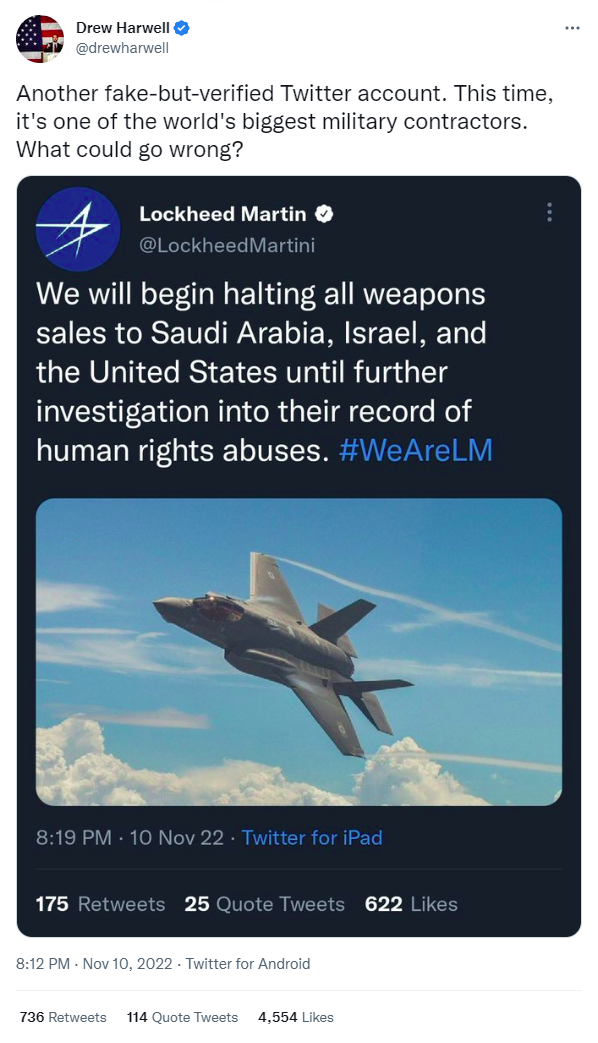

In [10]:
#Get user input
query = input("Query: ")

#As long as the query is valid (not empty or equal to '#')...
if query != '':
    noOfTweet = input("Enter the number of tweets you want to Analyze: ")
    if noOfTweet != '' :
        noOfDays = input("Enter the number of days you want to Scrape Twitter for: ")
        if noOfDays != '':
                #Creating list to append tweet data
                tweets_list = []
                now = dt.date.today()
                now = now.strftime('%Y-%m-%d')
                yesterday = dt.date.today() - dt.timedelta(days = int(noOfDays))
                yesterday = yesterday.strftime('%Y-%m-%d')
                for i,tweet in enumerate(sntwitter.TwitterSearchScraper(query + ' lang:en since:' +  yesterday + ' until:' + now + ' -filter:links -filter:replies').get_items()):
                    if i > int(noOfTweet):
                        break
                    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.username])

                #Creating a dataframe from the tweets list above 
                df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

                print(df)


Query: lockheed martin
Enter the number of tweets you want to Analyze: 500
Enter the number of days you want to Scrape Twitter for: 5
                     Datetime             Tweet Id  \
0   2022-11-13 23:05:24+00:00  1591930256323379200   
1   2022-11-13 23:04:56+00:00  1591930141067837442   
2   2022-11-13 22:40:29+00:00  1591923985448669190   
3   2022-11-13 21:42:44+00:00  1591909454018400256   
4   2022-11-13 20:46:16+00:00  1591895242470731776   
..                        ...                  ...   
396 2022-11-09 05:12:46+00:00  1590210767307112449   
397 2022-11-09 05:10:52+00:00  1590210289383149572   
398 2022-11-09 02:19:34+00:00  1590167181169680384   
399 2022-11-09 00:56:19+00:00  1590146230075547648   
400 2022-11-09 00:49:04+00:00  1590144406404751360   

                                                  Text         Username  
0                          lockheed martin pride socks  rigatonischolar  
1    Since much of the world knows about the main j...  dragonsreveng

In [11]:
# Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

#applying this function to Text column of our dataframe
df["Text"] = df["Text"].apply(cleanTxt)


In [12]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)

#Assigning Initial Values
positive = 0
negative = 0
neutral = 0
#Creating empty lists
tweet_list1 = []
neutral_list = []
negative_list = []
positive_list = []

#Iterating over the tweets in the dataframe
for tweet in df['Text']:
    tweet_list1.append(tweet)
    analyzer = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = analyzer['neg']
    neu = analyzer['neu']
    pos = analyzer['pos']
    comp = analyzer['compound']

    if neg > pos:
        negative_list.append(tweet) #appending the tweet that satisfies this condition
        negative += 1 #increasing the count by 1
    elif pos > neg:
        positive_list.append(tweet) #appending the tweet that satisfies this condition
        positive += 1 #increasing the count by 1
    elif pos == neg:
        neutral_list.append(tweet) #appending the tweet that satisfies this condition
        neutral += 1 #increasing the count by 1 

positive = percentage(positive, len(df)) #percentage is the function defined above
negative = percentage(negative, len(df))
neutral = percentage(neutral, len(df))


In [13]:
#Converting lists to pandas dataframe
tweet_list1 = pd.DataFrame(tweet_list1)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
#using len(length) function for counting
print("In the last " + noOfDays + " days, there have been", len(tweet_list1) ,  "tweets on " + query, end='\n*')
print("Positive Sentiment:", '%.2f' % len(positive_list), end='\n*')
print("Neutral Sentiment:", '%.2f' % len(neutral_list), end='\n*')
print("Negative Sentiment:", '%.2f' % len(negative_list), end='\n*')


In the last 5 days, there have been 401 tweets on lockheed martin
*Positive Sentiment: 188.00
*Neutral Sentiment: 70.00
*Negative Sentiment: 143.00
*

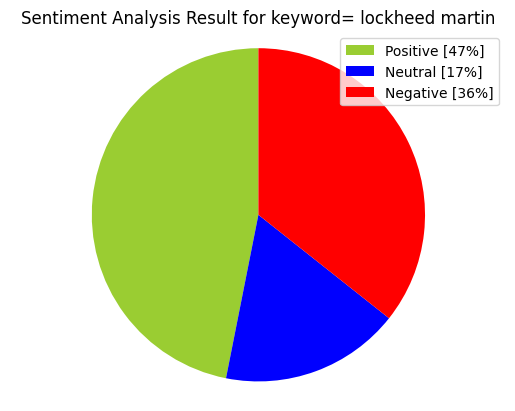

In [14]:
#Creating PieCart

labels = ['Positive ['+str(round(positive))+'%]' , 'Neutral ['+str(round(neutral))+'%]','Negative ['+str(round(negative))+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+query+"" )
plt.axis('equal')
plt.show()


Wordcloud for lockheed martin


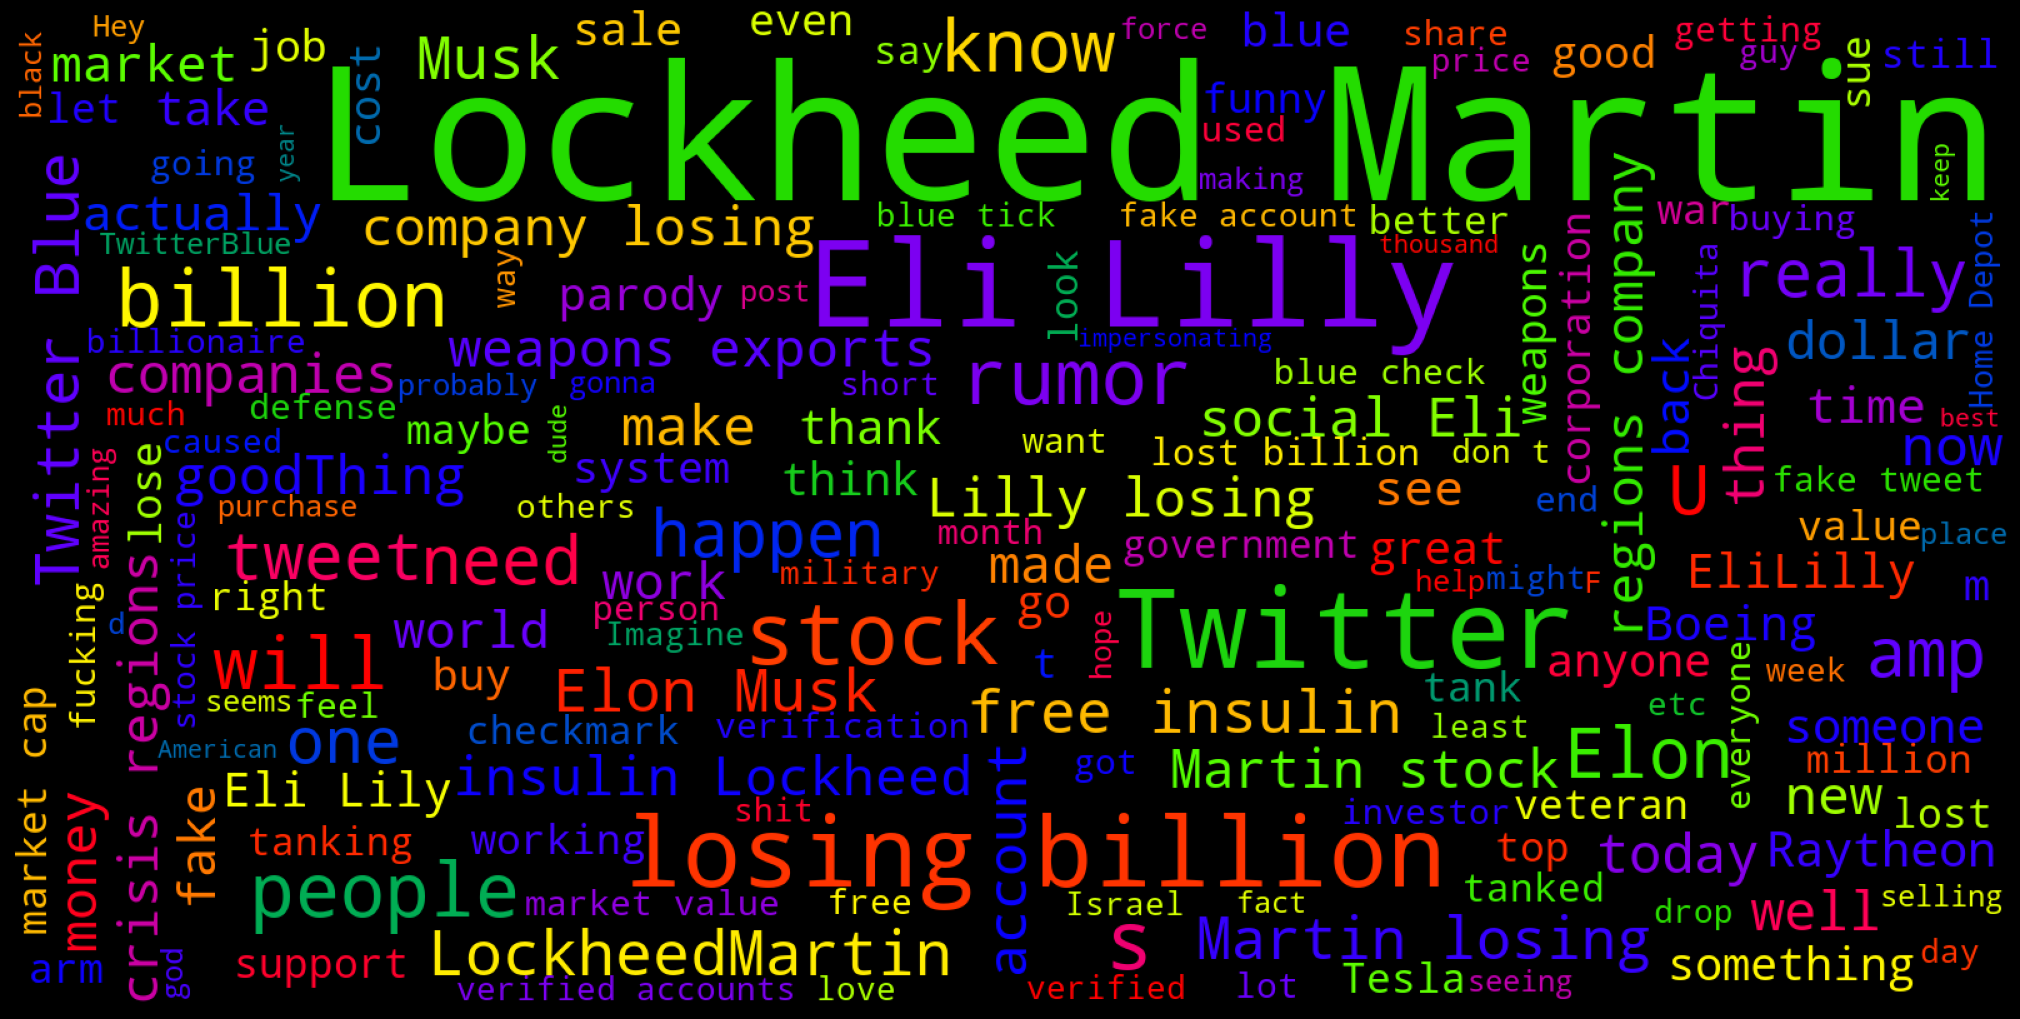

In [15]:
# word cloud visualization
def word_cloud(text):
    stopwords = set(STOPWORDS)
    allWords = ' '.join([twts for twts in text])
    wordCloud = WordCloud(background_color='black',width = 1600, height = 800,stopwords = stopwords,min_font_size = 20,max_font_size=150,colormap='prism').generate(allWords)
    fig, ax = plt.subplots(figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    ax.axis("off")
    fig.tight_layout(pad=0)
    plt.show()

print('Wordcloud for ' + query)
word_cloud(df['Text'].values)


## Yahoo Finance Data

In [16]:
import plotly.graph_objs as go
import yfinance as yf

choice = input("Write a stock symbol: ")
choice = choice.upper()

data = yf.download(tickers=choice, 
                   period = '5d', 
                   interval = '5m', 
                   rounding= True)

fig = go.Figure()
fig.add_trace(go.Candlestick(x=data.index,open = data['Open'], high=data['High'], low=data['Low'], close=data['Close'], name = 'market data'))
fig.update_layout(title = choice + ' share price', yaxis_title = 'Stock Price (USD)')
fig.update_xaxes(rangeslider_visible=True, 
                 rangeselector=dict(buttons=list([
                     dict(count=15, label='15m', step="minute", stepmode="backward"),
                     dict(count=45, label='45m', step="minute", stepmode="backward"),
                     dict(count=1, label='1h', step="hour", stepmode="backward"),
                     dict(count=6, label='6h', step="hour", stepmode="backward"),
                     dict(step="all")])))

fig.show()

Write a stock symbol: lmt
[*********************100%***********************]  1 of 1 completed


# Reddit Analysis of Eli Lilly 
### Down 4.45%

In [ ]:
#Get user input
query = input("Query: ")

#As long as the query is valid (not empty or equal to '#')...
if query != '':
    noOfPosts = input("Enter the number of posts you want to Analyze: ")
    if noOfPosts != '' :
        noOfDays = input("Enter the number of days you want to Scrape Twitter for: ")
        if noOfDays != '':
                #Creating list to append tweet data
                posts_list = []
                now = dt.date.today()
                now = now.strftime('%Y-%m-%d')
                yesterday = dt.date.today() - dt.timedelta(days = int(noOfDays))
                yesterday = yesterday.strftime('%Y-%m-%d')
                for i,Submission in enumerate(snreddit.RedditSearchScraper(query + ' lang:en since:' +  yesterday + ' until:' + now + ' -filter:links -filter:replies').get_items()):
                    if i > int(noOfPosts):
                        break
                    posts_list.append([tweet.date, tweet.id, tweet.content, tweet.username])

                #Creating a dataframe from the tweets list above 
                df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

                print(df)

# Twitter Analysis Post Midterm-Elections

# Examples with Other Socials